Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import warnings
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Data

In [2]:
retail = pd.read_csv (r'C:\Users\USER\OneDrive\Desktop\2024\retail.csv')

In [3]:
retail.sample(10)

,id,date,store_nbr,family,sales,onpromotion
900375,900375,22/05/2014,22,BEVERAGES,0.00,0
210541,210541,29/04/2013,17,BABY CARE,0.00,0
333476,333476,07/07/2013,16,FROZEN FOODS,35.00,0
272338,272338,02/06/2013,5,"LIQUOR,WINE,BEER",0.00,0
667329,667329,11/01/2014,33,BEVERAGES,1718.00,0
984699,984699,08/07/2014,38,GROCERY I,2987.00,3
3169,3169,02/01/2013,48,BABY CARE,0.00,0
1041684,1041684,09/08/2014,37,CELEBRATION,0.00,0
161783,161783,01/04/2013,48,HOME APPLIANCES,2.00,0
705311,705311,01/02/2014,49,BEAUTY,11.00,0


In [4]:
retail.shape

(1048575, 6)

In [5]:
retail.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [6]:
retail.family = retail.family.astype("category")

In [7]:
retail["date"]=  pd.to_datetime(retail["date"], format = "%d/%m/%Y")

In [8]:
print(retail.dtypes)

id                      int64
date           datetime64[ns]
store_nbr               int64
family               category
sales                 float64
onpromotion             int64
dtype: object


In [9]:
retail.sample()

,id,date,store_nbr,family,sales,onpromotion
163368,163368,2013-04-02,42,HOME CARE,0.00,0


In [10]:
retail.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family               category
sales                 float64
onpromotion             int64
dtype: object

In [11]:
retail['year'] = retail['date'].dt.year
retail['month'] = retail['date'].dt.month
retail['day'] = retail['date'].dt.day

In [12]:
retail.sample(4)

,id,date,store_nbr,family,sales,onpromotion,year,month,day
527380,527380,2013-10-23,7,CLEANING,1115.00,0,2013,10,23
639005,639005,2013-12-26,38,PET SUPPLIES,0.00,0,2013,12,26
9515,9515,2013-01-06,26,FROZEN FOODS,33.91,0,2013,1,6
600860,600860,2013-12-04,18,PREPARED FOODS,38.00,0,2013,12,4


In [13]:
retail.describe()

,id,date,store_nbr,sales,onpromotion,year,month,day
count,1048575.00,1048575,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00
mean,524287.00,2013-10-22 02:30:51.946499328,27.49,244.53,0.11,2013.38,5.64,15.49
min,0.00,2013-01-01 00:00:00,1.00,0.00,0.00,2013.00,1.00,1.00
25%,262143.50,2013-05-28 00:00:00,14.00,0.00,0.00,2013.00,3.00,8.00
50%,524287.00,2013-10-22 00:00:00,27.00,1.00,0.00,2013.00,5.00,15.00
75%,786430.50,2014-03-19 00:00:00,41.00,120.00,0.00,2014.00,8.00,23.00
max,1048574.00,2014-08-13 00:00:00,54.00,46271.00,196.00,2014.00,12.00,31.00
std,302697.67,NaN,15.58,806.59,2.38,0.49,3.21,8.80


In [14]:
family_unique = retail.family.nunique()
family_unique

33

In [15]:
stores= retail.store_nbr.nunique()
stores

54

In [16]:
retail.store_nbr.value_counts()

store_nbr
1     19437
20    19437
10    19437
3     19437
29    19437
28    19437
26    19437
25    19437
24    19437
23    19437
22    19437
21    19437
27    19437
2     19437
14    19437
11    19437
19    19437
12    19437
13    19437
15    19437
16    19437
17    19437
18    19437
46    19404
51    19404
47    19404
48    19404
49    19404
5     19404
50    19404
6     19404
52    19404
53    19404
54    19404
7     19404
8     19404
44    19404
45    19404
34    19404
43    19404
42    19404
41    19404
40    19404
4     19404
39    19404
38    19404
37    19404
36    19404
35    19404
33    19404
32    19404
31    19404
30    19404
9     19404
Name: count, dtype: int64

In [17]:
retail.family.value_counts()

family
AUTOMOTIVE                    31775
HOME APPLIANCES               31775
SCHOOL AND OFFICE SUPPLIES    31775
PRODUCE                       31775
PREPARED FOODS                31775
POULTRY                       31775
PLAYERS AND ELECTRONICS       31775
PET SUPPLIES                  31775
PERSONAL CARE                 31775
MEATS                         31775
MAGAZINES                     31775
LIQUOR,WINE,BEER              31775
LINGERIE                      31775
LAWN AND GARDEN               31775
LADIESWEAR                    31775
HOME CARE                     31775
HOME AND KITCHEN II           31775
BABY CARE                     31775
HOME AND KITCHEN I            31775
HARDWARE                      31775
GROCERY II                    31775
GROCERY I                     31775
FROZEN FOODS                  31775
EGGS                          31775
DELI                          31775
DAIRY                         31775
CLEANING                      31775
CELEBRATION          

In [18]:
retail.store_nbr = retail.store_nbr.astype("category")

In [19]:
retail.sample(3)

,id,date,store_nbr,family,sales,onpromotion,year,month,day
521377,521377,2013-10-20,38,EGGS,204.00,0,2013,10,20
766419,766419,2014-03-08,13,PLAYERS AND ELECTRONICS,6.00,0,2014,3,8
901021,901021,2014-05-22,4,"LIQUOR,WINE,BEER",114.00,0,2014,5,22


EDA

In [20]:
print(retail.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1048575 non-null  int64         
 1   date         1048575 non-null  datetime64[ns]
 2   store_nbr    1048575 non-null  category      
 3   family       1048575 non-null  category      
 4   sales        1048575 non-null  float64       
 5   onpromotion  1048575 non-null  int64         
 6   year         1048575 non-null  int32         
 7   month        1048575 non-null  int32         
 8   day          1048575 non-null  int32         
dtypes: category(2), datetime64[ns](1), float64(1), int32(3), int64(2)
memory usage: 46.0 MB
None


In [22]:
print(retail.describe())

              id                           date      sales  onpromotion  \
count 1048575.00                        1048575 1048575.00   1048575.00   
mean   524287.00  2013-10-22 02:30:51.946499328     244.53         0.11   
min         0.00            2013-01-01 00:00:00       0.00         0.00   
25%    262143.50            2013-05-28 00:00:00       0.00         0.00   
50%    524287.00            2013-10-22 00:00:00       1.00         0.00   
75%    786430.50            2014-03-19 00:00:00     120.00         0.00   
max   1048574.00            2014-08-13 00:00:00   46271.00       196.00   
std    302697.67                            NaN     806.59         2.38   

            year      month        day  
count 1048575.00 1048575.00 1048575.00  
mean     2013.38       5.64      15.49  
min      2013.00       1.00       1.00  
25%      2013.00       3.00       8.00  
50%      2013.00       5.00      15.00  
75%      2014.00       8.00      23.00  
max      2014.00      12.00      31.0

Visuals

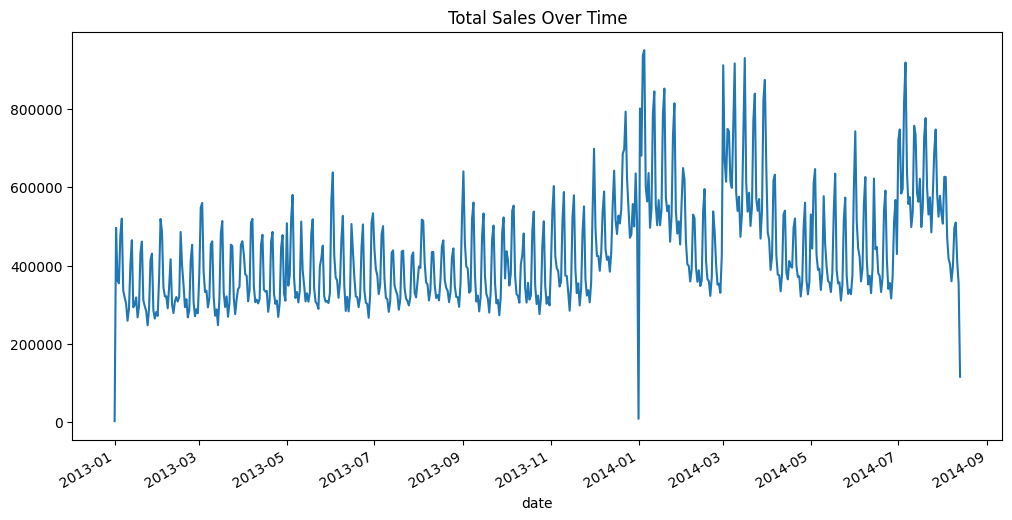

In [23]:
#overall sales trend
plt.figure(figsize=(12,6))
retail.groupby("date")["sales"].sum().plot()
plt.title("Total Sales Over Time")
plt.show()

In [25]:
#check for normality
print(stats.normaltest(retail[retail['onpromotion'] > 0]['sales']))


NormaltestResult(statistic=10613.730649278647, pvalue=0.0)


In [26]:
print(stats.normaltest(retail[retail['onpromotion'] == 0]['sales']))

NormaltestResult(statistic=1377653.6439365214, pvalue=0.0)


In [31]:
#check for variance
levene_result = stats.levene(retail[retail['onpromotion'] > 0]['sales'], 
                            retail[retail['onpromotion'] == 0]['sales'])
levene_result

LeveneResult(statistic=18027.600726397788, pvalue=0.0)

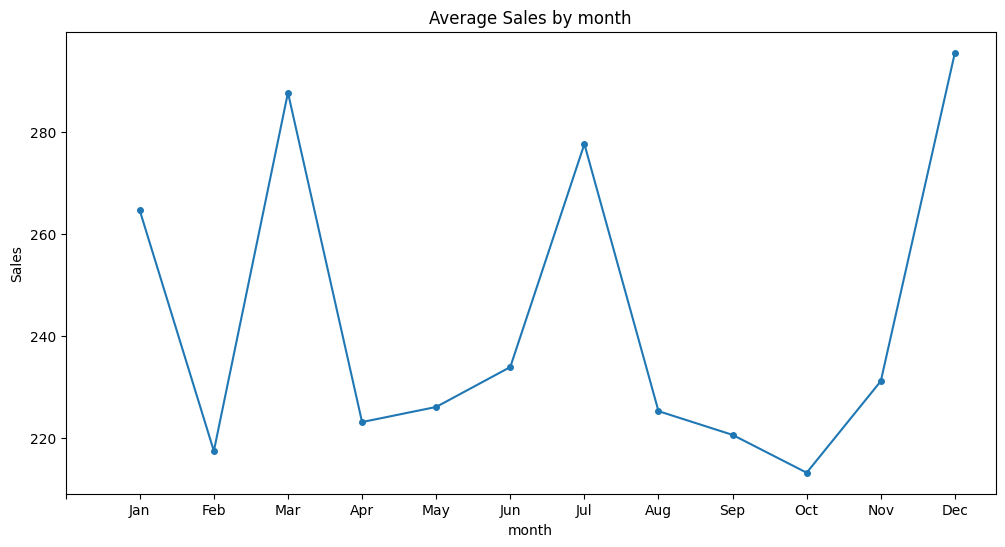

In [47]:
#sales by month
month_names = [' ','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize = (12,6))
retail.groupby("month")["sales"].mean().plot(marker = 'o', markersize = 4)
plt.title("Average Sales by month")
plt.xlabel("month")
plt.xticks(range(len(month_names)), month_names)
plt.ylabel("Sales")
plt.show()

In [49]:
retail['day_of_week'] =retail['date'].dt.dayofweek

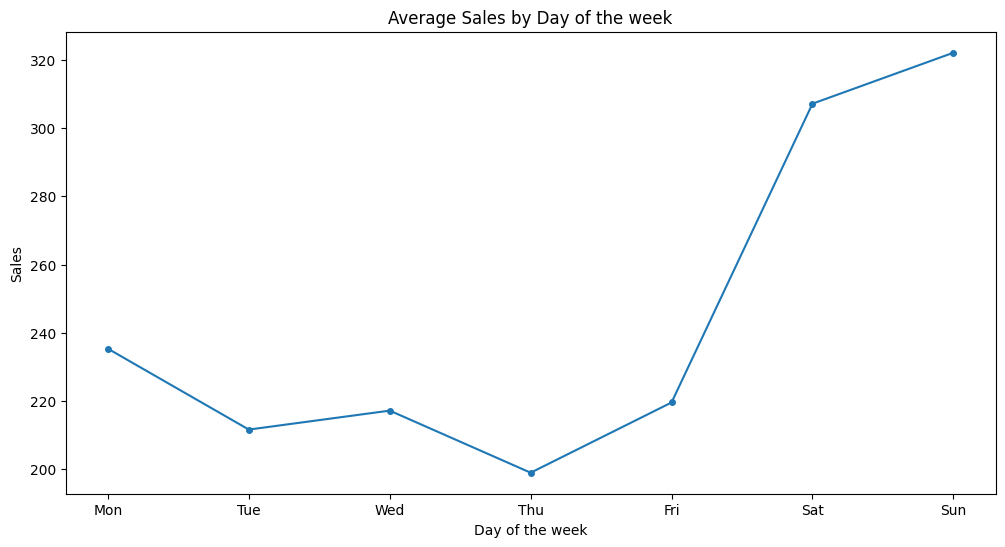

In [51]:
#average sales per week
plt.figure(figsize = (12,6))
retail.groupby("day_of_week")["sales"].mean().plot(marker = "o", markersize = 4)
plt.title("Average Sales by Day of the week")
plt.xlabel("Day of the week")
plt.xticks(range(7),["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.ylabel("Sales")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8856\2514601265.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retail.groupby("store_nbr")["sales"].mean().plot()


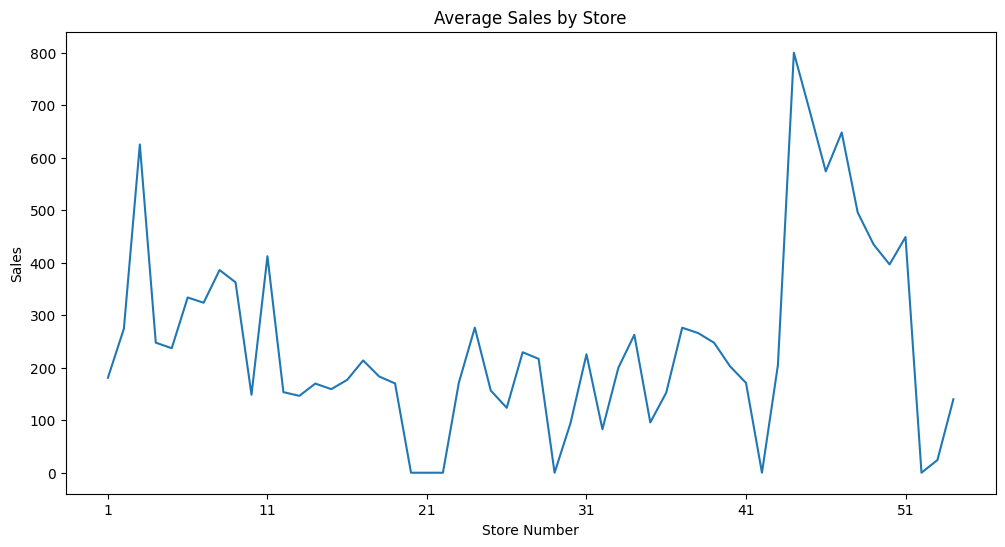

In [52]:
#Average sales by store
plt.figure(figsize=(12,6))
retail.groupby("store_nbr")["sales"].mean().plot()
plt.title("Average Sales by Store")
plt.xlabel("Store Number")
plt.ylabel("Sales")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8856\3579265705.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retail.groupby('family')['sales'].mean().sort_values(ascending=False).plot(kind='bar')


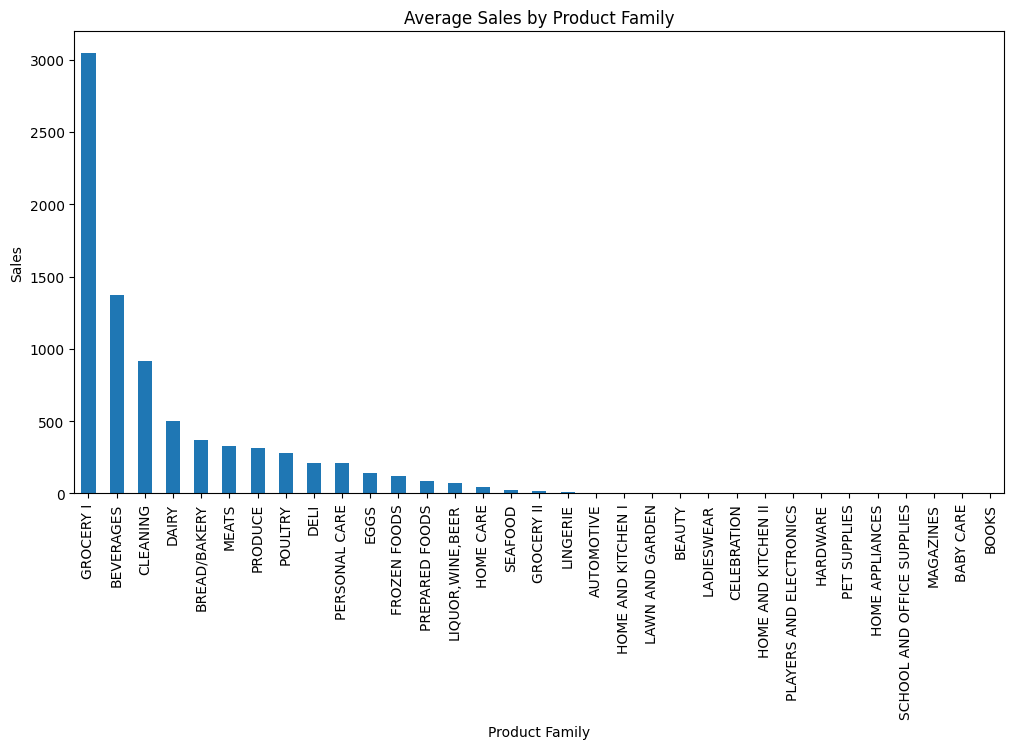

In [53]:
#average sales by product family
plt.figure(figsize=(12,6))
retail.groupby('family')['sales'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Sales by Product Family')
plt.xlabel('Product Family')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

In [65]:
#retail_corr_matrix
corr_matrix = ['sales', 'onpromotion', 'year', 'month', 'day', 'day_of_week']
retail_subset = retail[corr_matrix]
retail_corr_matrix= retail_subset.corr()
retail_corr_matrix

,sales,onpromotion,year,month,day,day_of_week
sales,1.00,0.09,0.04,-0.00,-0.01,0.04
onpromotion,0.09,1.00,0.06,0.02,-0.00,-0.00
year,0.04,0.06,1.00,-0.34,-0.03,0.00
month,-0.00,0.02,-0.34,1.00,-0.01,-0.00
day,-0.01,-0.00,-0.03,-0.01,1.00,-0.01
day_of_week,0.04,-0.00,0.00,-0.00,-0.01,1.00


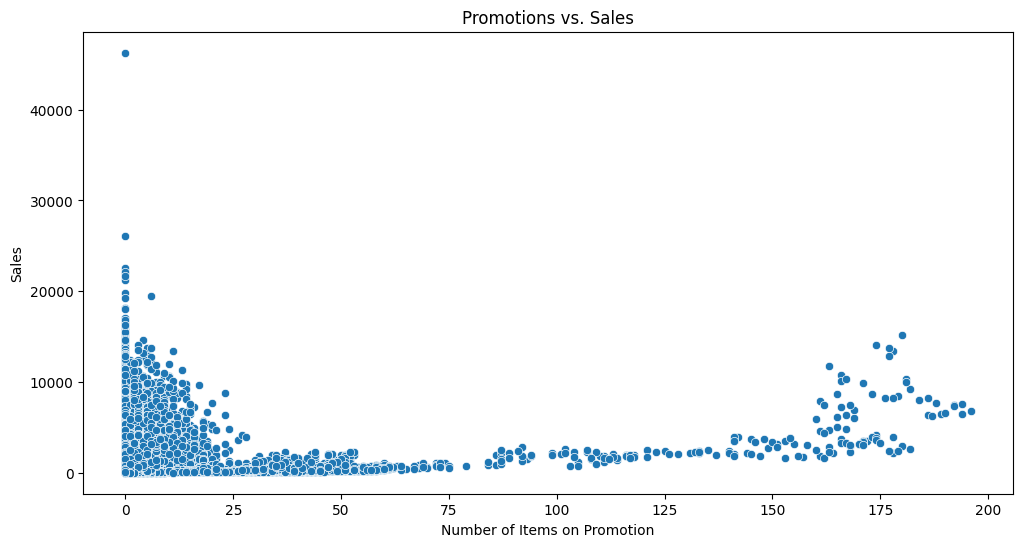

In [55]:
#relationship between promotion and sales
plt.figure(figsize=(12,6))
sns.scatterplot(x='onpromotion', y='sales', data=retail)
plt.title('Promotions vs. Sales')
plt.xlabel('Number of Items on Promotion')
plt.ylabel('Sales')
plt.show()


In [41]:
#Effect Size Calculation (Cohen's d)
promoted = retail[retail["onpromotion"] > 0]["sales"]
not_promoted = retail[retail["onpromotion"] ==0]["sales"]
u_statistic, p_value = mannwhitneyu (promoted, not_promoted)
print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"u-statistic: {u_statistic}")

Mann-Whitney U Statistic: 16665344270.5
u-statistic: 16665344270.5
